In [1]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.datasets import load_boston

boston = load_boston()
print(f"Keys of the boston dataset: {boston.keys()}")

Keys of the boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
print(f"boston.data.shape: {boston.data.shape}")
print(f"boston.target.shape: {boston.target.shape}")
print(f"boston.feature_names:\n{boston.feature_names}")
print(f"boston.DESCR:\n{boston.DESCR}")

boston.data.shape: (506, 13)
boston.target.shape: (506,)
boston.feature_names:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
boston.DESCR:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

In [3]:
X = boston.data
y = boston.target
boston_dataset = np.concatenate((X, y.reshape(-1, 1)), axis = 1)
print(f"boston.data[:5]:\n{boston.data}\n")
print(f"boston.target[:5]:\n{boston.target}\n")
print(f"boston_dataset[:5]:\n{boston_dataset}\n")
print(f"boston_dataset.shape: {boston_dataset.shape}")

boston.data[:5]:
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

boston.target[:5]:
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 1

In [4]:
import copy

boston_df = pd.DataFrame(boston_dataset)
columns = copy.deepcopy(boston.feature_names)
columns = np.append(columns, ['TAR'])
print(columns)
boston_df.columns = columns
boston_df.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'TAR']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAR
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


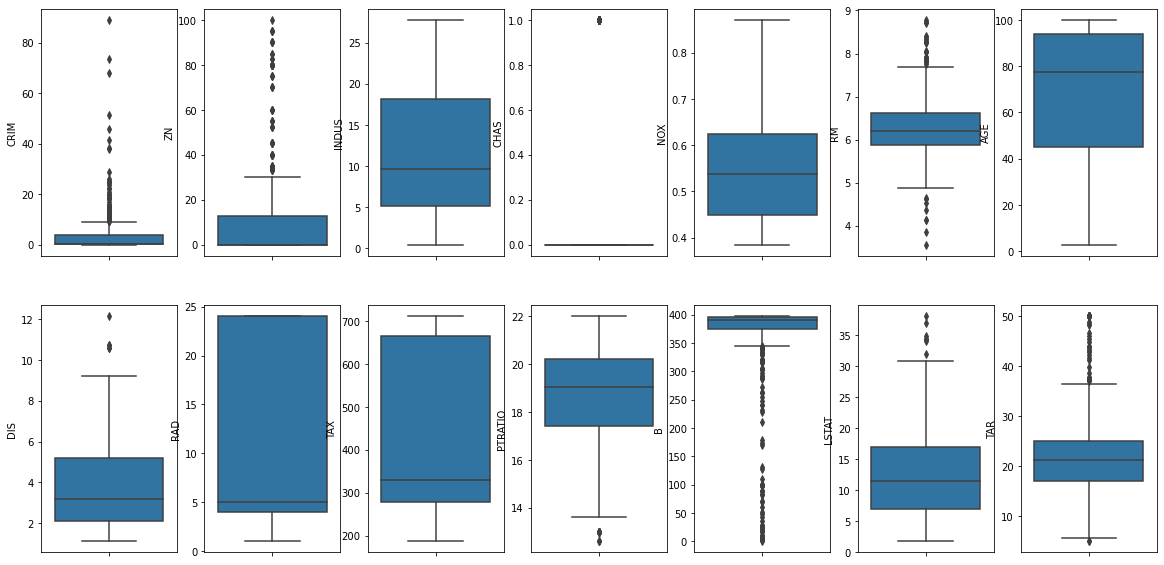

In [5]:
fig, axes = plt.subplots(2, 7, figsize = (20, 10))
axes = axes.flatten()
i = 0
for k, v in boston_df.items():
    sns.boxplot(y = k, data = boston_df, ax = axes[i])
    i += 1

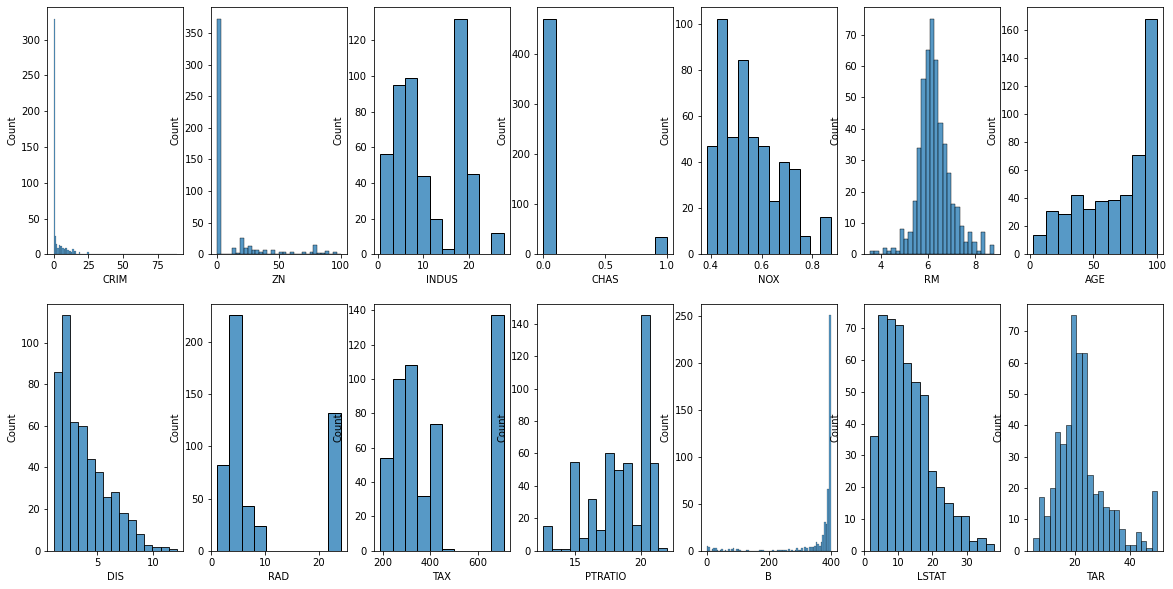

In [6]:
fig, axes = plt.subplots(2, 7, figsize = (20, 10))
axes = axes.flatten()
i = 0
for k, v in boston_df.items():
    sns.histplot(v, ax = axes[i])
    i += 1

In [7]:
boston_df.B.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [8]:
boston_df.CRIM = np.log(boston_df.CRIM + 1)
boston_df.ZN = np.log(boston_df.ZN + 1)

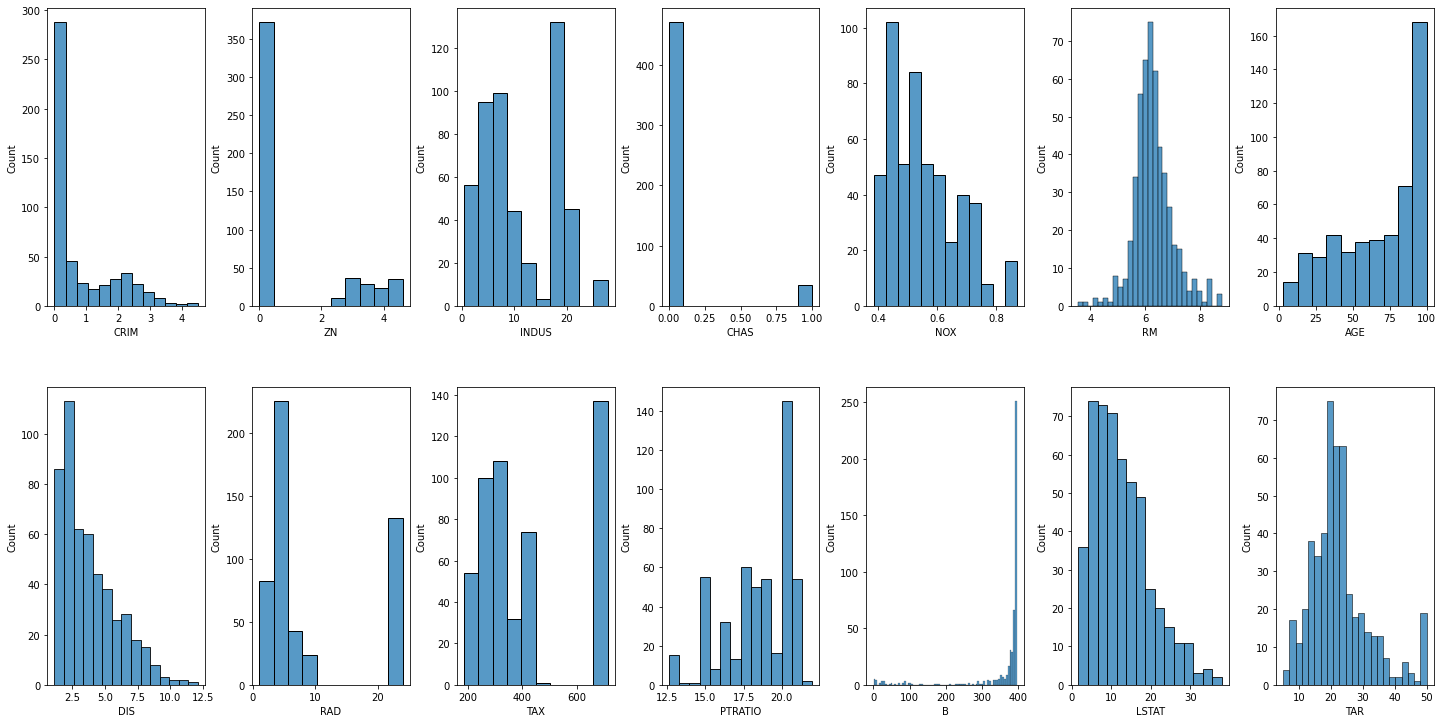

In [21]:
fig, axes = plt.subplots(2, 7, figsize = (20, 10))
axes = axes.flatten()
i = 0
for k, v in boston_df.items():
    sns.histplot(v, ax = axes[i])
    i += 1
plt.tight_layout(pad = 0.5, w_pad=0.5, h_pad=5.0)

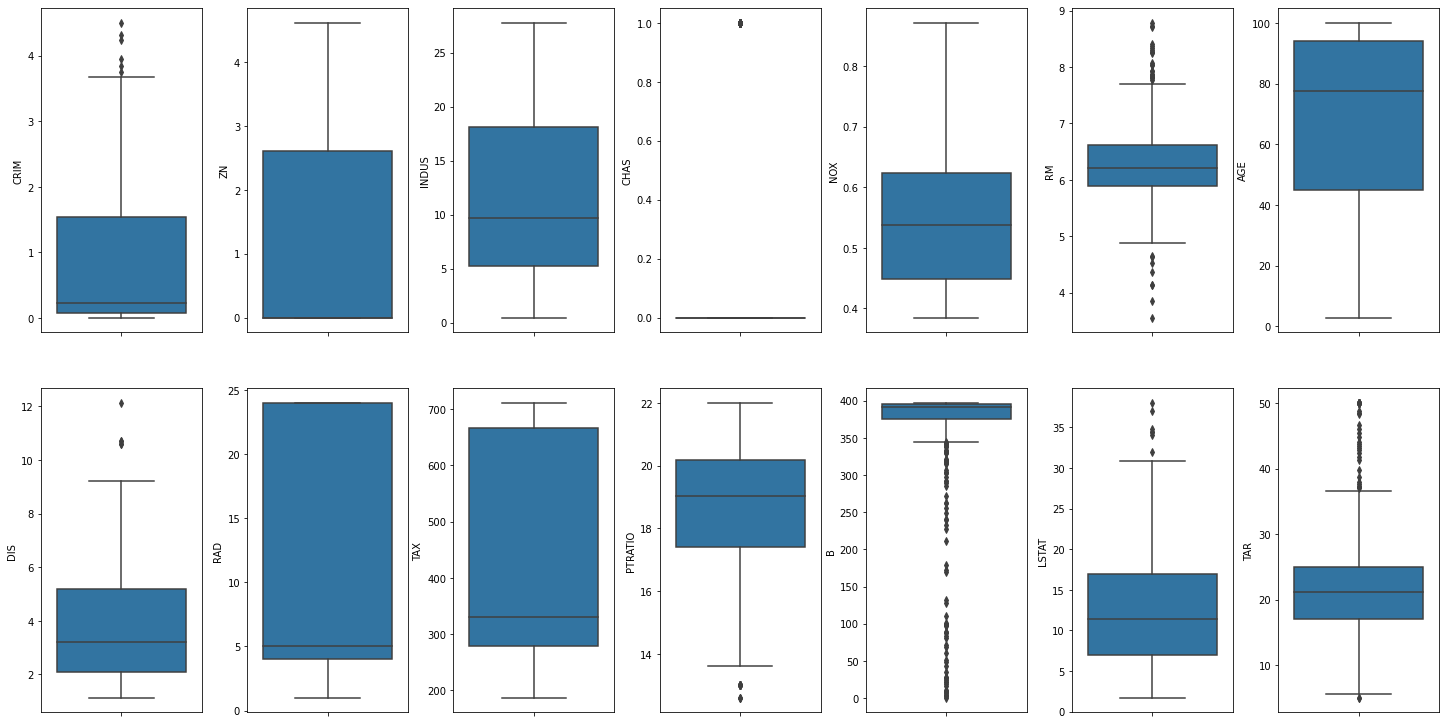

In [11]:
fig, axes = plt.subplots(2, 7, figsize = (20, 10))
axes = axes.flatten()
i = 0
for k, v in boston_df.items():
    sns.boxplot(y = k, data = boston_df, ax = axes[i])
    i += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [25]:
boston_df = pd.get_dummies(boston_df, columns = ['CHAS'])
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAR,CHAS_0.0,CHAS_1.0
0,0.006300,2.944439,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.026944,0.000000,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.026924,0.000000,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.031857,0.000000,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.066770,0.000000,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [29]:
boston_df = boston_df.drop(columns = ['TAR'])
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0.0,CHAS_1.0
0,0.006300,2.944439,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0
1,0.026944,0.000000,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,0
2,0.026924,0.000000,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,0
3,0.031857,0.000000,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,0
4,0.066770,0.000000,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,0


(379, 14)
(379,)
Best parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}
Best cross-validation score: 0.8512049195135909
Test set score: 0.7841457841678491


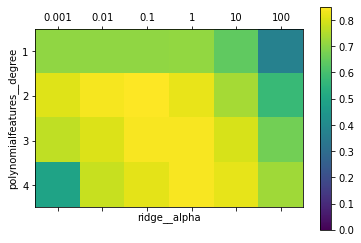

In [44]:
X = boston_df
y = boston.target

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = make_pipeline(MinMaxScaler(), PolynomialFeatures(), Ridge())
param_grid = {'polynomialfeatures__degree' : [1, 2, 3, 4], 'ridge__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv = 5)
print(X_train.shape)
print(y_train.shape)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")
print(f"Test set score: {grid.score(X_test, y_test)}")
plt.matshow(grid.cv_results_['mean_test_score'].reshape(4, -1), vmin=0, cmap="viridis")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.colorbar()

(379, 13)
(379,)
Best parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}
Best cross-validation score: 0.8568179803823469
Test set score: 0.7906795626609765


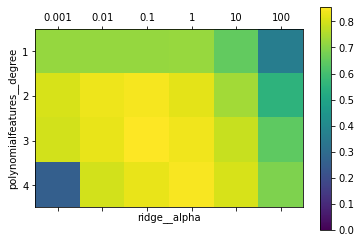

In [46]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid = GridSearchCV(pipe, param_grid, cv = 5)
print(X_train.shape)
print(y_train.shape)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")
print(f"Test set score: {grid.score(X_test, y_test)}")
plt.matshow(grid.cv_results_['mean_test_score'].reshape(4, -1), vmin=0, cmap="viridis")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.colorbar()